# HW 3
Katie Corcoran

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set()

import warnings
warnings.filterwarnings('ignore')

### 1.

In [ ]:
df = pd.read_csv('Logan_housing.csv')
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


### 2.

In [ ]:
df.drop(columns=['Garage Capacity', 'Irregular Shape', 'Sold Terms', 'Zip', 'month_sold', 'Year Built', 'year_sold'], inplace=True)

### 3.

In [ ]:
print(df.isna().sum())
df.replace(to_replace=' ', value=np.nan, inplace=True)
print(df.isna().sum() / len(df) * 100)

Sold Price           0
DOM                  0
HOA Fee              0
Quadrant             0
School District      0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
built_after_2000     0
dtype: int64
Sold Price           0.0
DOM                  0.0
HOA Fee              0.0
Quadrant             0.0
School District      0.0
Total Bedrooms       0.0
Total Bathrooms      0.0
Total Square Feet    0.0
built_after_2000     0.0
dtype: float64


No missing data!

### 4.

In [ ]:
df.nunique()

,0
Sold Price,1217
DOM,248
HOA Fee,96
Quadrant,4
School District,2
Total Bedrooms,9
Total Bathrooms,7
Total Square Feet,2009
built_after_2000,2


Based on this and the context of the data, we can determine the categorical vs numeric variables:

In [ ]:
categoricals = ['Quadrant', 'School District', 'built_after_2000']
numerics = [col for col in df.columns if col not in categoricals]

df[numerics]= df[numerics].apply(lambda x: x.astype('float'))
df[categoricals]= df[categoricals].apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   float64 
 1   DOM                4110 non-null   float64 
 2   HOA Fee            4110 non-null   float64 
 3   Quadrant           4110 non-null   category
 4   School District    4110 non-null   category
 5   Total Bedrooms     4110 non-null   float64 
 6   Total Bathrooms    4110 non-null   float64 
 7   Total Square Feet  4110 non-null   float64 
 8   built_after_2000   4110 non-null   category
dtypes: category(3), float64(6)
memory usage: 205.3 KB


### 5.

1.

In [ ]:
df.describe()

,Sold Price,DOM,HOA Fee,Total Bedrooms,Total Bathrooms,Total Square Feet
count,4.110000e+03,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000
mean,2.821252e+05,40.550608,36.178345,3.821168,2.577372,2370.429440
std,1.178647e+05,51.571991,69.565512,1.182697,0.851165,1049.690077
min,1.300000e+04,1.000000,0.000000,1.000000,1.000000,520.000000
25%,2.140000e+05,6.000000,0.000000,3.000000,2.000000,1583.000000
50%,2.600000e+05,23.000000,0.000000,4.000000,3.000000,2141.000000
75%,3.249000e+05,56.000000,65.000000,5.000000,3.000000,2941.750000
max,1.900000e+06,712.000000,1050.000000,9.000000,7.000000,10890.000000


The range of DOM is 1.0 day to 712.0 days.

2.

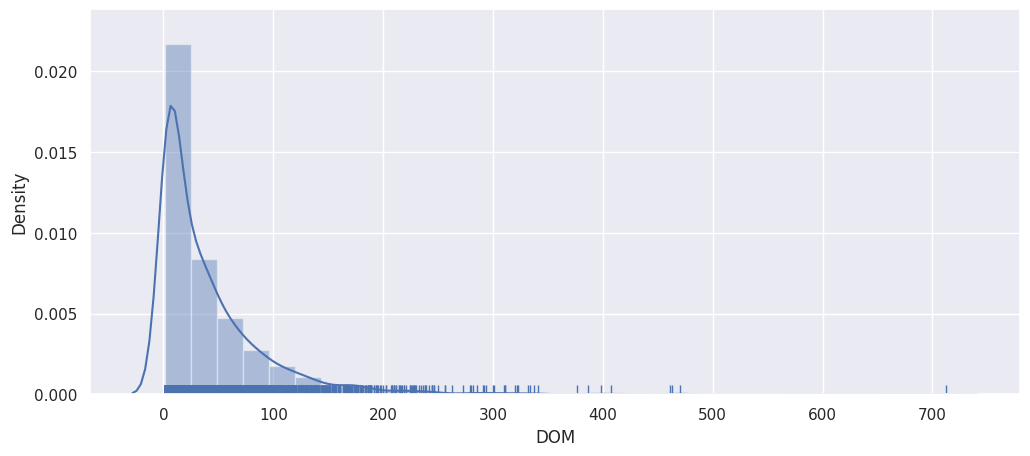

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['DOM'], bins=30 , rug=True)
plt.show()

From this plot we can see that DOM is not normally distributed and is quite right skewed.

3.

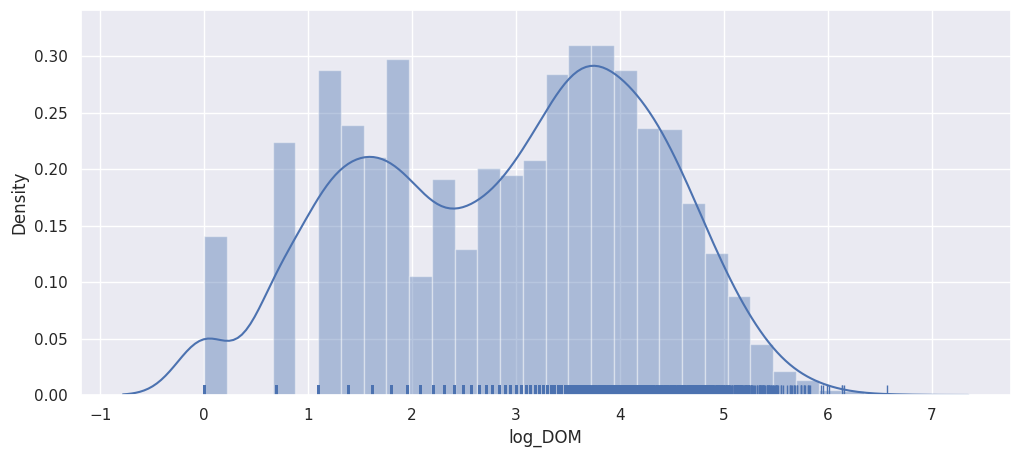

In [ ]:
df['log_DOM'] = np.log(df['DOM'])
plt.figure(figsize=(12,5))
sns.distplot(df['log_DOM'], bins=30 , rug=True)
plt.show()

Log_DOM is still not perfectly normally distributed, but it is more normal and much less skewed.

### 6.

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Sold_Price', 'DOM', 'HOA_Fee', 'Quadrant', 'School_District',
       'Total_Bedrooms', 'Total_Bathrooms', 'Total_Square_Feet',
       'built_after_2000', 'log_DOM'],
      dtype='object')

### 7.

1.

In [ ]:
reg1 = smf.ols(formula= "DOM ~ Sold_Price + HOA_Fee + Quadrant + School_District + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000", data=df).fit()

2.

In [ ]:
reg2 = smf.ols(formula= "log_DOM ~ Sold_Price + HOA_Fee + Quadrant + School_District + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000", data=df).fit()

3.

In [ ]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DOM   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     47.45
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           2.73e-90
Time:                        20:45:35   Log-Likelihood:                -21812.
No. Observations:                4110   AIC:                         4.365e+04
Df Residuals:                    4099   BIC:                         4.372e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   17.4482      3.664      4.762      0.000      10.264      24.632
Quadrant[T.NW]              -1.3290      2.334     -0.569      0.569      -5.905       3.247
Quadrant[T.SE]              -4.0166      2.148     -1.870      0.062      -8.228       0.195
Quadrant[T.SW]              -4.2135      2.151     -1.959      0.050      -8.430       0.003
School_District[T.Logan]    -6.4084      1.834     -3.494      0.000     -10.004      -2.813
built_after_2000[T.1]        4.9188      1.824      2.696      0.007       1.342       8.496
Sold_Price               -1.894e-05   1.23e-05     -1.540      0.124   -4.31e-05    5.18e-06
HOA_Fee                      0.0586      0.012      4.780      0.000       0.035       0.083
Total_Bedrooms              -4.6591      0.923     -5.048      0.000      -6.468      -2.850
Total_Bathrooms              1.2421      1.285      0.967      0.334      -1.277       3.761
Total_Square_Feet            0.0181      0.002     11.644      0.000       0.015       0.021
==============================================================================
Omnibus:                     2550.291   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41181.563
Skew:                           2.684   Prob(JB):                         0.00
Kurtosis:                      17.549   Cond. No.                     1.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_DOM   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     43.11
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           6.17e-82
Time:                        20:45:45   Log-Likelihood:                -6944.5
No. Observations:                4110   AIC:                         1.391e+04
Df Residuals:                    4099   BIC:                         1.398e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.1937      0.098     22.294      0.000       2.001       2.387
Quadrant[T.NW]              -0.0076      0.063     -0.121      0.904      -0.130       0.115
Quadrant[T.SE]              -0.0176      0.058     -0.305      0.760      -0.131       0.095
Quadrant[T.SW]              -0.0928      0.058     -1.606      0.108      -0.206       0.020
School_District[T.Logan]    -0.1889      0.049     -3.836      0.000      -0.285      -0.092
built_after_2000[T.1]        0.2310      0.049      4.715      0.000       0.135       0.327
Sold_Price               -1.737e-06    3.3e-07     -5.259      0.000   -2.38e-06   -1.09e-06
HOA_Fee                      0.0013      0.000      3.823      0.000       0.001       0.002
Total_Bedrooms              -0.0388      0.025     -1.564      0.118      -0.087       0.010
Total_Bathrooms              0.0563      0.035      1.630      0.103      -0.011       0.124
Total_Square_Feet            0.0005   4.18e-05     11.610      0.000       0.000       0.001
==============================================================================
Omnibus:                      298.242   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.352
Skew:                          -0.233   Prob(JB):                     3.00e-29
Kurtosis:                       2.259   Cond. No.                     1.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. Based on coefficients in regression 1, the SW quadrant is selling fastest, because its coefficient has the largest negative effect on DOM.

5. According to regression 1, if the HOA fee increases by \$100, holding everything else constant, the average DOM would increase by 5.86 days. This makes sense because I would expect a house to be more difficult to sell if it had a higher HOA fee, and \$100 is quite expensive.

6. According to regression 2, for each added bedroom the DOM is expected to decrease by 3.88%. This makes sense, because I would expect houses with more bedrooms to usually sell faster, although I would be curious to see if that changed for very large houses with 10+ bedrooms.

### 8.

1.

In [ ]:
from statsmodels.tools import eval_measures

predictions = reg1.predict()
actuals = df.DOM
mae = eval_measures.meanabs(actuals, predictions)
print(f"MAE: {mae}")
mse = eval_measures.mse(actuals, predictions)
print(f"MSE: {mse}")
rmse = eval_measures.rmse(actuals, predictions)
print(f"RMSE: {rmse}")
rmspe = np.sqrt(np.mean(((actuals-predictions)/actuals)**2))
print(f"RMSPE: {rmspe}")

MAE: 33.56984614164994
MSE: 2383.127964493403
RMSE: 48.817291654632
RMSPE: 8.316233955432082


2. The errors are 831% off on average.

3. The unit for days for MAE, days<sup>2</sup> for MSE, and days for RMSE.